# Melanoma Classification Model - Template


## Set up

#### Set up for importing utilities

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

 #### Random State
 Please use the following random state for all methods that may take a random state in order to achieve reproducable results

In [2]:
from utilities import random_state
random_state = random_state() 

#### Export Config
You may configure 
- whether the results shall be exported (export_results)
- where the results will be exported to

The default folder "export" will not be tracked by git in order to avoid flooding the repository with w.i.p. results. If you want to save a result on github, please rename it including the type of model and the date and move the picture to another folder :)

In [3]:
export_results = True
export_folder = 'export'

date_format = "%d%m%Y%H%M%S" # timestamp format in exported files
if export_results:
    import datetime
    import os
    if not os.path.exists(export_folder): 
      os.makedirs(export_folder)
      print("Created new directory %s" %export_folder)

## Get data

#### Get image paths
You may adjust the number of images loaded in order to run models more quickly on your private computer. Note hoewever that the less images you use the worse the predictions will likely be. 

For developing models on the cluster the max_images parameter should be removed. Instead call the method get_all_img_paths(img_folder).

In [4]:
from utilities import get_img_paths

img_folder_train = "data/train" # change this to the folder including your images!
img_folder_test = "data/test"
max_images_train = 80
max_images_test = 10

img_paths_train = get_img_paths(img_folder_train, max_images_train) 
img_paths_test = get_img_paths(img_folder_test, max_images_test)

#### Load data
Loads the images specified in img_paths into a data frame. This includes resizing the images and flattening them into an array and may take a while.

In [5]:
from utilities import load_data
import threading 
import pandas as pd

groundtruth_file_train = "data/ISIC_2020_2019_train.csv" # change this to the path where you have your data!
groundtruth_file_test = "data/ISIC_2020_2019_test.csv"


def get_df(result_arr, index, img_paths, groundtruth_file, name):
    print("start loading " + name)
    df = load_data(img_paths, groundtruth_file)
    result_arr[index] = df
    print("done loading " + name)

result = [None] * 2
    
t1 = threading.Thread(target=get_df, args=(result, 0, img_paths_train, groundtruth_file_train, "train")) # thread.start_new_thread(get_df, (df_train, img_paths_train, groundtruth_file_train))
t2 = threading.Thread(target=get_df, args=(result, 1, img_paths_test, groundtruth_file_test, "test")) # thread.start_new_thread(get_df, (df_test, img_paths_test, groundtruth_file_test))

t1.start()
t2.start()
            
t1.join()
t2.join()

df_train = result[0]
df_test = result[1]

#df_train = load_data(img_paths_train, groundtruth_file_train)
#df_test = load_data(img_paths_test, groundtruth_file_test)

start loading train
start loading test
done loading test
done loading train


#### Split into target and predictors

In [6]:
from utilities import split_predictors_target

X_train, y_train = split_predictors_target(df_train) 
X_test, y_test = split_predictors_target(df_test) 

## Train model
Put your model here! 

In [7]:
import sklearn 
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=42)
model.fit(X_train, y_train)

C:\Users\apfel\anaconda3\envs\tf2\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=42,
              solver='lbfgs')

## Test model

#### Predict test set
You may need to modify this depending on your model. Important thing is that after this step, the results of your classification should be stored in y_pred so that the following steps will work!

In [8]:
y_pred = model.predict(X_test)

#### Print report

In [9]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, digits=4)
print(f'\nClassification_report=\n{report}')

if export_results:
    file = open(export_folder + "/classification_report_"+datetime.datetime.now().strftime(date_format)+".txt", 'w')
    file.write(report)
    file.close()

C:\Users\apfel\anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\apfel\anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\apfel\anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification_report=
              precision    recall  f1-score   support

           0     0.8000    1.0000    0.8889         8
           1     0.0000    0.0000    0.0000         2

    accuracy                         0.8000        10
   macro avg     0.4000    0.5000    0.4444        10
weighted avg     0.6400    0.8000    0.7111        10



#### Display images and predictions
Note: you may pass a fourth parameter indicating the maximum images displayed. per default this parameter is set as 50

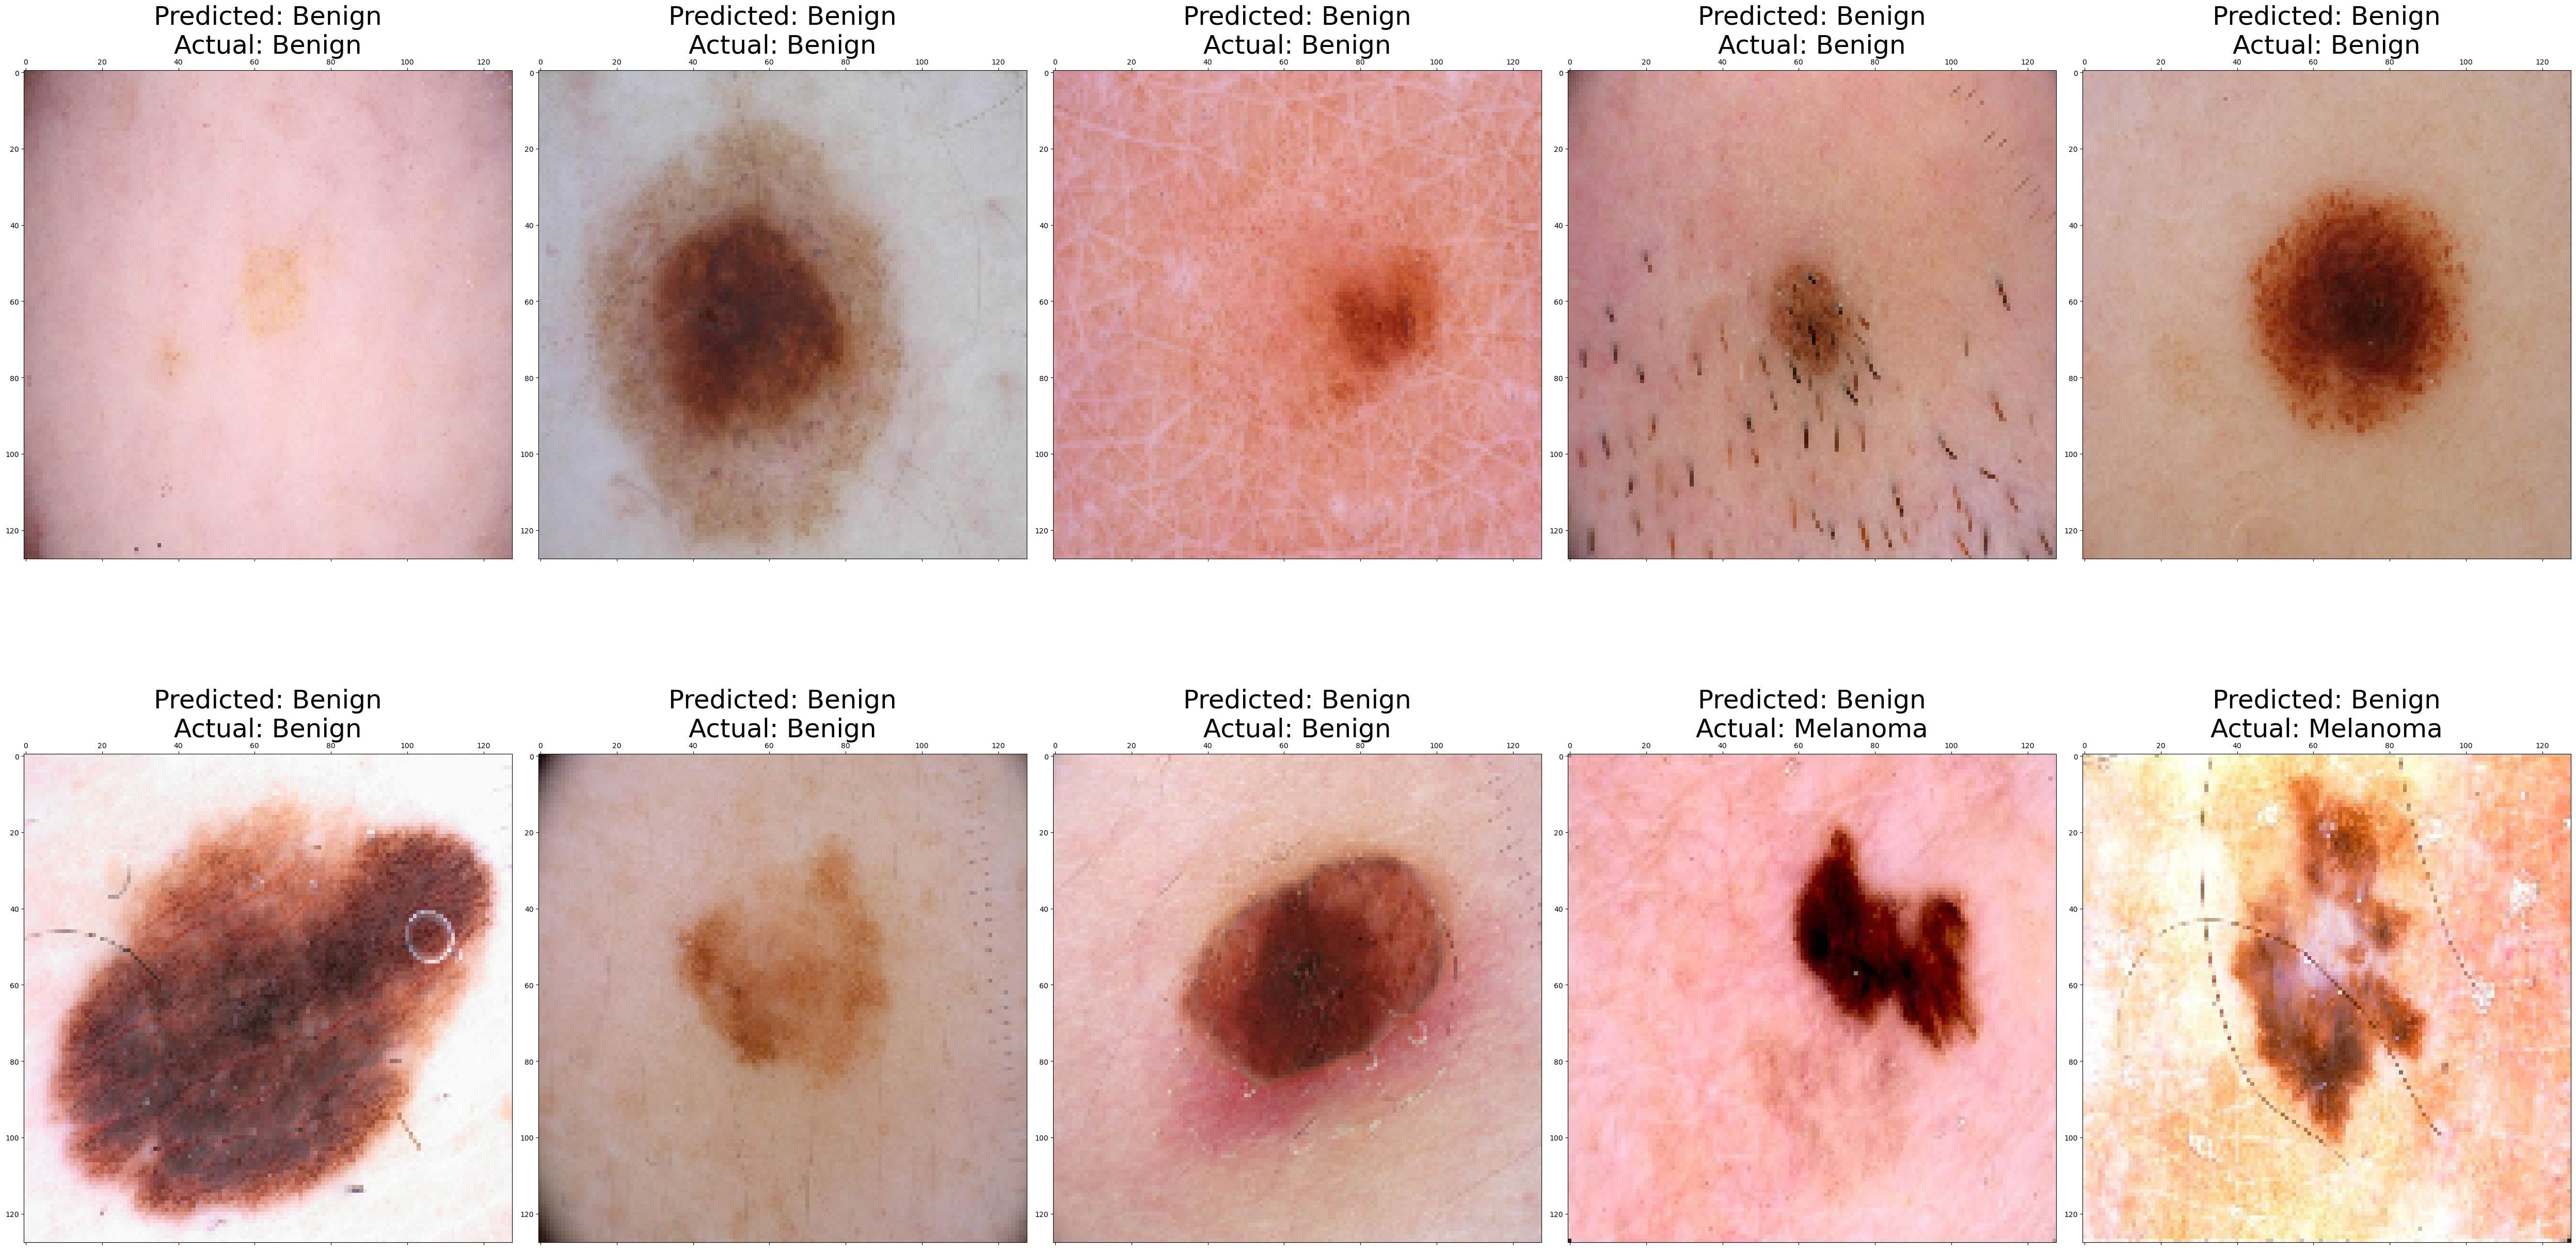

In [10]:
from utilities import display_results

plt_all = display_results(X_test, y_pred, y_test, 15)

if export_results:
    plt_all.savefig(export_folder + "/classification_results_"+datetime.datetime.now().strftime(date_format)+".png")

plt_all.show()

#### Display wrongly classified images
Note: you may pass a fourth parameter indicating the maximum images displayed. per default this parameter is set as 50

In [ ]:
from utilities import display_interesting_results

plt_wrong = display_interesting_results(X_test, y_pred, y_test)

if export_results:
    plt_wrong.savefig(export_folder + "/incorrect_classification_results_"+datetime.datetime.now().strftime(date_format)+".png")
    
plt_wrong.show()